In [1]:
import re

import pandas as pd
from collections import Counter
from wordcloud import WordCloud

from reviews.config import processed_data_dir
from reviews.preprocess import preprocess

In [2]:
# read data
reviews_df = pd.read_json(
    processed_data_dir / "reviews_digital_cameras.json.gz", orient="records"
)
reviews_df.dropna(inplace=True)
reviews_df.drop_duplicates(inplace=True)

reviews_df = reviews_df.sample(1000)  # subset

reviews_df.reset_index(inplace=True, drop=True)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   overall    1000 non-null   int64         
 1   vote       1000 non-null   int64         
 2   asin       1000 non-null   object        
 3   text       1000 non-null   object        
 4   summary    1000 non-null   object        
 5   timestamp  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 47.0+ KB


In [3]:
# apply preprocessing
reviews_df["tokens"] = reviews_df["text"].apply(lambda x: preprocess(x))

/home/saiteki-kai/MEGA/プロジェクト/進行中/data-analytics/venv/lib/python3.10/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [4]:
tokens = [word for doc in reviews_df["tokens"] for sent in doc for word in sent]
c = Counter(tokens)

In [5]:
len(tokens)

79080

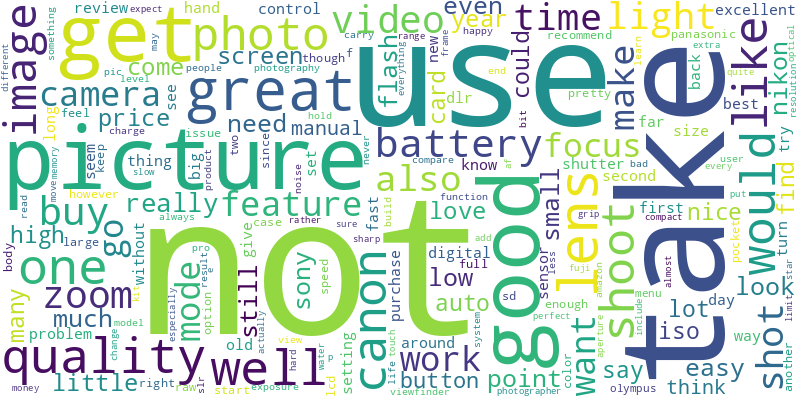

In [6]:
# generate the word cloud
w = WordCloud(
    collocations=False,
    prefer_horizontal=0.6,
    width=800,
    height=400,
    background_color="white",
).fit_words(c)
w.to_image()

# Look for bad results

In [16]:
# check long words
set([t for t in tokens if len(t) > 15])

{'astrophotographers',
 'borrowlenses.com',
 'enthusiastically',
 'indistinguishable',
 'interoperability',
 'photographically',
 'weatherproofness'}

In [13]:
strange_tokens = ["previously.sony"]

In [15]:
for q in strange_tokens:
    for i, row in reviews_df.iterrows():
        if q in [t for s in row["tokens"] for t in s]:
            print(row["text"])
            print(row["tokens"])
            print("\n")